In [28]:
import os
from pathlib import Path
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" #had to include to prevent creating 
#a copy of a certain lib that kept killing the kernel
iskaggle=os.environ.get('KAGGLE_KERNEL_RUN_TYPE','')

if iskaggle: 
    path=Path('../input/titanic')
else:
    path=Path('titanic')
    if not path.exists():
        import zipfile,kaggle
        kaggle.api.competition_download_cli(str(path))
        zipfile.ZipFile(f'{path}.zip').extractall(path)
#downloading the titanic.csv dataset    

In [29]:
import torch,numpy as np,pandas as pd
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140,sci_mode=False,edgeitems=7)
pd.set_option('display.width',140)

In [30]:
df=pd.read_csv(path/'train.csv')
df #opening the loaded csv file

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [31]:
'''CLEANING THE DATA'''
df.isna().sum() #summary of all columns with no data

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
modes=df.mode().iloc[0]
modes #extracting a sample that is not clean

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [33]:
df.fillna(modes,inplace=True)

In [34]:
df.isna().sum() #seeing summary again after filling modes cols with values

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [35]:
df.describe(include=(np.number))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


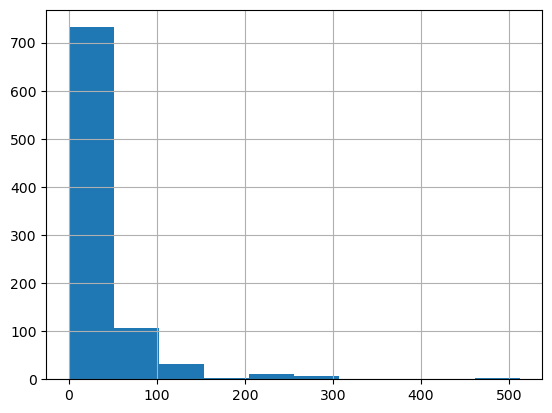

In [36]:
df['Fare'].hist();

In [37]:
df['LogFare']=np.log(df['Fare']+1) #taking log on Fare readings to normalise values 

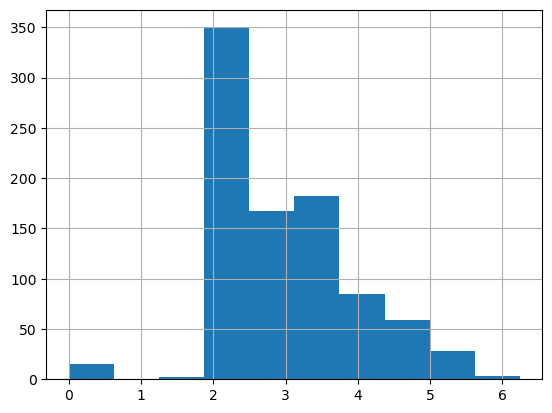

In [38]:
df['LogFare'].hist();

In [39]:
pclasses=sorted(df.Pclass.unique())
pclasses

[1, 2, 3]

In [40]:
df.describe(include=[object]) #getting a quick summary of all non numeric columns in dataset

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [41]:
#pandas automatically creates columns to give numerical values to categorical data
df=pd.get_dummies(df,columns=['Sex','Pclass','Embarked'])
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'LogFare', 'Sex_female', 'Sex_male',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [42]:
added_cols=['Sex_male','Sex_female','Pclass_1','Pclass_2','Pclass_3','Embarked_C','Embarked_Q',
            'Embarked_S'] 
df[added_cols].head()

,Sex_male,Sex_female,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,0,0,1,0,0,1
1,0,1,1,0,0,1,0,0
2,0,1,0,0,1,0,0,1
3,0,1,1,0,0,0,0,1
4,1,0,0,0,1,0,0,1


In [43]:
from torch import tensor
t_dep=tensor(df.Survived) #the values that we have to predict- dependent

In [44]:
indep_cols=['Age','SibSp','Parch','LogFare']+added_cols #independent cols
t_indep=tensor(df[indep_cols].values,dtype=torch.float)
t_indep

tensor([[22.0000,  1.0000,  0.0000,  2.1102,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [38.0000,  1.0000,  0.0000,  4.2806,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000],
        [26.0000,  0.0000,  0.0000,  2.1889,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  1.0000,  0.0000,  3.9908,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  0.0000,  0.0000,  2.2028,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [24.0000,  0.0000,  0.0000,  2.2469,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000],
        [54.0000,  0.0000,  0.0000,  3.9677,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        ...,
        [25.0000,  0.0000,  0.0000,  2.0857,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [39.0000,  0.0000,  5.0000,  3.4054

In [45]:
t_indep.shape

torch.Size([891, 12])

In [46]:
'''Setting up a linear Model'''
'''
Now that we've got a matrix of independent 
variables and a dependent variable vector, 
we can work on calculating our predictions and our loss. 
In this section, we're going to manually do a single step of calculating 
predictions and loss for every row of our data.
Our first model will be a simple linear model. 
We'll need a coefficient for each column in t_indep. 
We'll pick random numbers in the range (-0.5,0.5), 
and set our manual seed so that my explanations in the prose in this notebook 
will be consistent with what you see when you run it.
'''
torch.manual_seed(442)
n_coeff=t_indep.shape[1]
coeffs=torch.rand(n_coeff)-0.5
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625])

In [47]:
t_indep*coeffs #element wise multiplication

tensor([[-10.1838,   0.1386,   0.0000,  -0.4772,  -0.2632,  -0.0000,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-17.5902,   0.1386,   0.0000,  -0.9681,  -0.0000,  -0.3147,   0.4876,   0.0000,   0.0000,  -0.4392,   0.0000,   0.0000],
        [-12.0354,   0.0000,   0.0000,  -0.4950,  -0.0000,  -0.3147,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-16.2015,   0.1386,   0.0000,  -0.9025,  -0.0000,  -0.3147,   0.4876,   0.0000,   0.0000,  -0.0000,   0.0000,   0.3625],
        [-16.2015,   0.0000,   0.0000,  -0.4982,  -0.2632,  -0.0000,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-11.1096,   0.0000,   0.0000,  -0.5081,  -0.2632,  -0.0000,   0.0000,   0.0000,   0.2799,  -0.0000,   0.2103,   0.0000],
        [-24.9966,   0.0000,   0.0000,  -0.8973,  -0.2632,  -0.0000,   0.4876,   0.0000,   0.0000,  -0.0000,   0.0000,   0.3625],
        ...,
        [-11.5725,   0.0000,   0.0000,  -0.4717,  -0.2632,  -0.0000,   0.0000

In [48]:
vals,indices=t_indep.max(dim=0)
t_indep=t_indep/vals

In [49]:
t_indep*coeffs

tensor([[-0.1273,  0.0173,  0.0000, -0.0765, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2199,  0.0173,  0.0000, -0.1551, -0.0000, -0.3147,  0.4876,  0.0000,  0.0000, -0.4392,  0.0000,  0.0000],
        [-0.1504,  0.0000,  0.0000, -0.0793, -0.0000, -0.3147,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2025,  0.0173,  0.0000, -0.1446, -0.0000, -0.3147,  0.4876,  0.0000,  0.0000, -0.0000,  0.0000,  0.3625],
        [-0.2025,  0.0000,  0.0000, -0.0798, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.1389,  0.0000,  0.0000, -0.0814, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.2103,  0.0000],
        [-0.3125,  0.0000,  0.0000, -0.1438, -0.2632, -0.0000,  0.4876,  0.0000,  0.0000, -0.0000,  0.0000,  0.3625],
        ...,
        [-0.1447,  0.0000,  0.0000, -0.0756, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2257,  0.0000,  0.2008, -0.1234

In [50]:
t_indep=t_indep/vals

In [51]:
preds=(t_indep*coeffs).sum(axis=1) #bsically matrix mult

In [55]:
preds[:10] #peeking into preds col


tensor([ 0.3675, -0.2917,  0.3131,  0.5119,  0.3638,  0.2121,  0.5599,  0.3742,  0.3246, -0.4591])

In [56]:
'''Obviously these predictions are useless now because the coefficients 
were very random, Except they are indeed starting points for our 
gradient descent process.
'''

'Obviously these predictions are useless now because the coefficients \nwere very random, Except they are indeed starting points for our \ngradient descent process.\n'

In [57]:
loss=torch.abs(preds-t_dep).mean()
loss

tensor(0.5415)

In [60]:
def calc_preds(coeffs,indeps):return (indeps*coeffs).sum(axis=1)
def calc_loss(coeffs,indeps,deps):return torch.abs(calc_preds(coeffs,indeps)-deps).mean()

In [61]:
coeffs.requires_grad_()

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625], requires_grad=True)

In [62]:
loss=calc_loss(coeffs,t_indep,t_dep)
loss

tensor(0.5415, grad_fn=<MeanBackward0>)

In [64]:
loss.backward() #pytorch func to calculate gradients

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [65]:
coeffs.grad

tensor([ 0.0003,  0.0018, -0.0005, -0.0034,  0.2548, -0.1908, -0.1212, -0.0067,  0.1919, -0.1886,  0.0191,  0.2334])

In [66]:
loss=calc_loss(coeffs,t_indep,t_dep)
loss.backward()
coeffs.grad

tensor([ 0.0007,  0.0036, -0.0010, -0.0069,  0.5095, -0.3816, -0.2424, -0.0135,  0.3838, -0.3771,  0.0382,  0.4669])

In [68]:
loss=calc_loss(coeffs,t_indep,t_dep)
loss.backward()
with torch.no_grad():
    coeffs.sub_(coeffs.grad*0.1)
    coeffs.grad.zero_()
    print(calc_loss(coeffs,t_indep,t_dep))
#Note that a.sub_(b) subtracts b from a in-place. 
#In PyTorch, any method that ends in _ changes its object in-place. 
#Similarly, a.zero_() sets all elements of a tensor to zero.

tensor(0.4374)


In [69]:
'''Training the linear model'''
#getting validation and training set using RandomSplitter
from fastai.data.transforms import RandomSplitter
trn_split,val_split=RandomSplitter(seed=42)(df)

In [70]:
trn_indep,val_indep=t_indep[trn_split],t_indep[val_split]

In [71]:
#applying the indices to our indep and dep variables
trn_dep,val_dep=t_dep[trn_split],t_dep[val_split]
len(trn_indep),len(val_indep)

(713, 178)

In [ ]:
'''We'll create functions for the three things we did manually above: 
updating coeffs, 
doing one full gradient descent step, 
and initilising coeffs to random numbers:'''

In [72]:
def update_coeffs(coeffs,lr):
    coeffs.sub_(coeffs.grad*lr)
    coeffs.grad.zero_()

In [82]:
def one_epoch(coeffs,lr):
    loss=calc_loss(coeffs,trn_indep,trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs,lr)
    print(f"{loss:.3f}",end="; ")

In [83]:
def init_coeffs():
    return (torch.rand(n_coeff)-0.5).requires_grad_()

In [84]:
def train_model(epochs=30,lr=0.01):
    torch.manual_seed(442)
    coeffs=init_coeffs()
    for i in range(epochs):one_epoch(coeffs,lr=lr)
    return coeffs

In [85]:
coeffs=train_model(18,lr=0.2) # we can see that the loss is reducing 

0.539; 0.492; 0.444; 0.419; 0.426; 0.379; 0.386; 0.367; 0.340; 0.358; 0.311; 0.354; 0.329; 0.301; 0.323; 0.283; 0.304; 0.285; 

In [86]:
def show_coeffs():
    return dict(zip(indep_cols,coeffs.requires_grad_(False)))
show_coeffs()

{'Age': tensor(-0.4620),
 'SibSp': tensor(0.1377),
 'Parch': tensor(0.2451),
 'LogFare': tensor(-0.1862),
 'Sex_male': tensor(-0.4198),
 'Sex_female': tensor(0.2177),
 'Pclass_1': tensor(0.6980),
 'Pclass_2': tensor(0.3781),
 'Pclass_3': tensor(0.3809),
 'Embarked_C': tensor(0.0702),
 'Embarked_Q': tensor(0.2114),
 'Embarked_S': tensor(0.2279)}

In [93]:
'''Measuring Accuracy'''
preds = calc_preds(coeffs, val_indep)

In [94]:
results = val_dep.bool()==(preds>0.5)
results[:16]

tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True, False, False, False,  True,  True, False])

In [95]:
results.float().mean()

tensor(0.7865)

In [97]:
def acc(coeffs):
    return (val_dep.bool()==(calc_preds(coeffs,val_indep)>0.5)).float().mean()
acc(coeffs)

tensor(0.7865)

In [98]:
preds[:28]


tensor([0.7931, 0.1604, 0.0195, 0.1643, 0.1718, 0.1711, 0.6625, 0.8090, 0.1948, 0.6609, 0.1762, 0.0252, 0.1857, 0.7978, 0.1769, 0.4870,
        0.4855, 0.8129, 0.1676, 0.8133, 0.1768, 0.4862, 0.9695, 0.8159, 0.1776, 0.1575, 0.8234, 0.4858])

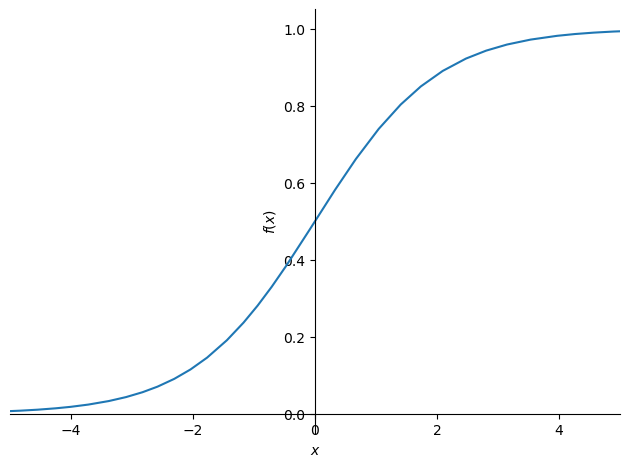

In [100]:
import sympy
sympy.plot("1/(1+exp(-x))", xlim=(-5,5));

In [101]:
def calc_preds(coeffs, indeps): return torch.sigmoid((indeps*coeffs).sum(axis=1))

In [102]:
coeffs = train_model(lr=100)

0.524; 0.291; 0.211; 0.203; 0.199; 0.198; 0.198; 0.197; 0.197; 0.196; 0.196; 0.196; 0.196; 0.195; 0.195; 0.195; 0.195; 0.195; 0.195; 0.195; 0.195; 0.195; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 

In [103]:
acc(coeffs)

tensor(0.8258)

In [104]:
show_coeffs()

{'Age': tensor(-0.4786),
 'SibSp': tensor(-0.0450),
 'Parch': tensor(0.1119),
 'LogFare': tensor(-0.2008),
 'Sex_male': tensor(-10.1734),
 'Sex_female': tensor(7.9806),
 'Pclass_1': tensor(3.3944),
 'Pclass_2': tensor(2.2695),
 'Pclass_3': tensor(-6.1976),
 'Embarked_C': tensor(1.4253),
 'Embarked_Q': tensor(2.1883),
 'Embarked_S': tensor(-5.0948)}

In [105]:
'''Submitting to Kaggle'''

'Submitting to Kaggle'

In [106]:
tst_df=pd.read_csv(path/'test.csv')

In [107]:
tst_df['Fare']=tst_df.Fare.fillna(0)

In [108]:
tst_df.fillna(modes, inplace=True)
tst_df['LogFare'] = np.log(tst_df['Fare']+1)
tst_df = pd.get_dummies(tst_df, columns=["Sex","Pclass","Embarked"])

tst_indep = tensor(tst_df[indep_cols].values, dtype=torch.float)
tst_indep = tst_indep / vals

In [109]:
tst_df['Survived'] = (calc_preds(tst_indep, coeffs)>0.5).int()

In [112]:
sub_df = tst_df[['PassengerId','Survived']]
sub_df.to_csv('sub.csv', index=False)

In [115]:
!sub.csv

In [116]:
'''Using Matrix Product'''

'Using Matrix Product'

In [117]:
(val_indep*coeffs).sum(axis=1)

tensor([ 12.4232, -14.1957, -14.9584, -13.0223, -13.0142, -13.0179,   3.1973,   5.1396, -21.4831,   3.1926, -21.4795, -14.9595, -21.4766,
          3.9582, -21.4787, -11.8943, -11.8958,   5.1395, -13.0186,  -3.3258, -21.4789, -11.8951,  12.7754,   5.1356, -21.4781, -14.2018,
         -3.3224, -11.8955, -21.4788,   3.9583,   5.1466,  -3.3303, -21.4785, -21.4794,  12.4228,  -3.3265, -11.8957,  12.7765, -21.4790,
         -3.3257, -13.0127, -21.4790, -13.0122,  12.7754, -21.4787,  -3.3184, -21.4886, -21.4836, -14.1952,  -3.3243,  -4.6187, -21.4837,
        -21.4810, -21.4784, -13.0132, -13.0137, -14.1957, -21.4837, -21.4787, -21.4826,  -5.3733, -21.4785, -11.8975, -21.4787,   5.1343,
        -11.8947, -13.0141, -21.4853, -14.1978,   5.1381, -21.4790,   3.1983, -13.0136, -21.4797, -11.8926, -21.4782, -21.4790, -11.9006,
        -13.0137, -13.0165, -13.0161,  12.7747, -21.4788, -21.4785,   5.1390,  -6.4943,  -5.3800,   6.2599,  11.6560, -13.0140, -21.4797,
        -21.4790,  12.7739, -14.95

In [118]:
val_indep@coeffs

tensor([ 12.4232, -14.1957, -14.9584, -13.0223, -13.0142, -13.0179,   3.1973,   5.1396, -21.4831,   3.1926, -21.4795, -14.9595, -21.4766,
          3.9582, -21.4787, -11.8943, -11.8958,   5.1395, -13.0186,  -3.3258, -21.4789, -11.8951,  12.7754,   5.1356, -21.4780, -14.2018,
         -3.3224, -11.8955, -21.4788,   3.9583,   5.1466,  -3.3303, -21.4785, -21.4794,  12.4228,  -3.3265, -11.8957,  12.7765, -21.4790,
         -3.3257, -13.0127, -21.4790, -13.0122,  12.7754, -21.4787,  -3.3184, -21.4886, -21.4836, -14.1952,  -3.3243,  -4.6187, -21.4837,
        -21.4810, -21.4784, -13.0132, -13.0137, -14.1957, -21.4837, -21.4787, -21.4826,  -5.3733, -21.4785, -11.8975, -21.4787,   5.1343,
        -11.8947, -13.0141, -21.4853, -14.1978,   5.1381, -21.4790,   3.1983, -13.0136, -21.4797, -11.8926, -21.4782, -21.4790, -11.9006,
        -13.0137, -13.0165, -13.0161,  12.7747, -21.4788, -21.4785,   5.1390,  -6.4943,  -5.3800,   6.2599,  11.6560, -13.0140, -21.4797,
        -21.4790,  12.7739, -14.95

In [119]:
def calc_preds(coeffs, indeps): return torch.sigmoid(indeps@coeffs)

In [120]:
def init_coeffs(): return (torch.rand(n_coeff, 1)*0.1).requires_grad_()

In [121]:
trn_dep = trn_dep[:,None]
val_dep = val_dep[:,None]

In [122]:
coeffs = train_model(lr=100)

0.512; 0.296; 0.212; 0.202; 0.198; 0.198; 0.197; 0.197; 0.196; 0.196; 0.196; 0.196; 0.195; 0.195; 0.195; 0.195; 0.195; 0.195; 0.195; 0.195; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 

In [123]:
acc(coeffs)

tensor(0.8258)

In [126]:
'''A neural Network
create coefficients for each of our layers.
choose whatever n_hidden we like -- 
a higher number gives our network more flexibility
'''

'A neural Network\ncreate coefficients for each of our layers.\nchoose whatever n_hidden we like -- a higher number gives our network more flexibility\n'

In [125]:
def init_coeffs(n_hidden=20):
    layer1 = (torch.rand(n_coeff, n_hidden)-0.5)/n_hidden
    layer2 = torch.rand(n_hidden, 1)-0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(),layer2.requires_grad_(),const.requires_grad_()

In [127]:
import torch.nn.functional as F
#Now we have our coefficients, we can create our neural net. 
#The key steps are the two matrix products, 
#indeps@l1 and res@l2 (where res is the output of the first layer). 
#The first layer output is passed to F.relu (that's our non-linearity), 
#and the second is passed to torch.sigmoid as before.
def calc_preds(coeffs, indeps):
    l1,l2,const = coeffs
    res = F.relu(indeps@l1)
    res = res@l2 + const
    return torch.sigmoid(res)

In [128]:
def update_coeffs(coeffs, lr):
    for layer in coeffs:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [129]:
coeffs = train_model(lr=1.4)

0.544; 0.533; 0.521; 0.507; 0.491; 0.470; 0.445; 0.416; 0.384; 0.352; 0.325; 0.304; 0.288; 0.275; 0.265; 0.256; 0.250; 0.245; 0.240; 0.237; 0.234; 0.231; 0.229; 0.227; 0.226; 0.225; 0.223; 0.222; 0.221; 0.220; 

In [130]:
coeffs = train_model(lr=20)

0.544; 0.416; 0.256; 0.311; 0.212; 0.200; 0.198; 0.197; 0.196; 0.195; 0.194; 0.194; 0.194; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 

In [131]:
acc(coeffs)


tensor(0.8258)

In [132]:
'''DEEP LEARNING
The neural net in the previous section only uses one hidden layer, 
so it doesn't count as "deep" learning. 
But we can use the exact same technique to make our neural net deep, 
by adding more matrix multiplications.
'''

'DEEP LEARNING'

In [133]:
def init_coeffs():
    hiddens = [10, 10]  # <-- set this to the size of each hidden layer you want
    sizes = [n_coeff] + hiddens + [1]
    n = len(sizes)
    layers = [(torch.rand(sizes[i], sizes[i+1])-0.3)/sizes[i+1]*4 for i in range(n-1)]
    consts = [(torch.rand(1)[0]-0.5)*0.1 for i in range(n-1)]
    for l in layers+consts: l.requires_grad_()
    return layers,consts

In [134]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    layers,consts = coeffs
    n = len(layers)
    res = indeps
    for i,l in enumerate(layers):
        res = res@l + consts[i]
        if i!=n-1: res = F.relu(res)
    return torch.sigmoid(res)

In [135]:
def update_coeffs(coeffs, lr):
    layers,consts = coeffs
    for layer in layers+consts:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [136]:
coeffs = train_model(lr=4)

0.526; 0.483; 0.464; 0.378; 0.373; 0.361; 0.346; 0.356; 0.304; 0.214; 0.209; 0.207; 0.210; 0.202; 0.203; 0.202; 0.204; 0.198; 0.196; 0.195; 0.195; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.193; 0.193; 

In [137]:
acc(coeffs)

tensor(0.8258)

In [ ]:
'''
The biggest differences in practical models to what we have above are:

-How initialisation and normalisation is done to ensure the model trains correctly every time
-Regularization (to avoid over-fitting)
-Modifying the neural net itself to take advantage of knowledge of the problem domain
-Doing gradient descent steps on smaller batches, rather than the whole dataset.
'''